In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
groups = {
    "Chromatine\nRemodelling": ["CBP", "CBX3", "CHD1", "CHD4", "CHD7", "CTCF", "DNMT1", "EZH2", 
                               "HDAC1", "HLTF", "LSD1", "MORC2", "PCAF", "PHF8", 
                               "RBBP5", "SAFB", "SAFB2", "SUZ12", "WDR5"],
    "RNA\nProcessing/Export": ["FUS", "hnRNPC", "hnRNPH", "hnRNPL", "hnRNPUL1", "ILF3", "KHSRP", "NONO", 
                                   "NUP98", "PTBP1", "RBFOX2", "RBM15", "RBM22", "SRSF1", "SRSF7", 
                                   "SRSF9", "TARDBP", "U2AF1", "U2AF2", "ZC3H11A"],
    "Transcriptional\nRegulation": ["EWSR1", "FUS", "GTF2F1", "hnRNPK", "hnRNPUL1", "LARP7", "NONO", "PCBP1", 
                              "TAF15", "YBX3", "U2AF2", "ZC3H8"]
}
# added FUS hnRNPUL1 U2AF2 and NONO to third group

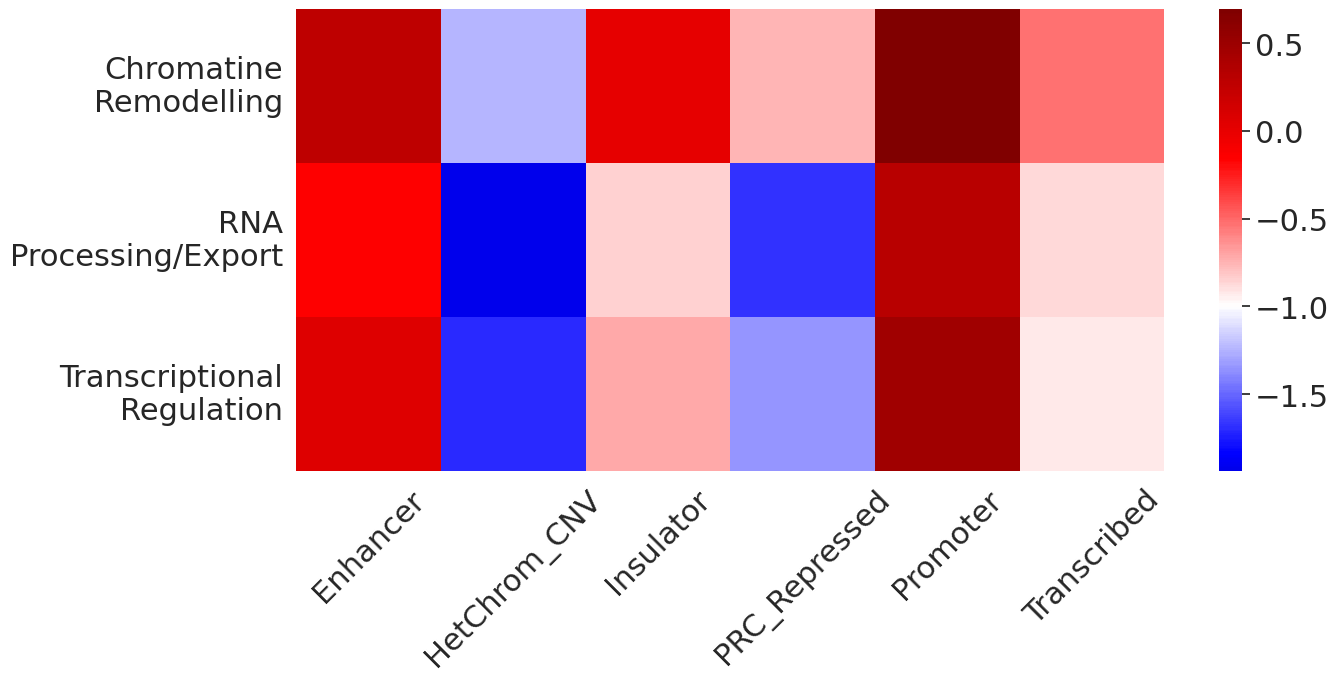

In [10]:
# mean of group data
plt.figure(figsize=(14,6))
sns.set(font_scale=2)
triad_dens = pd.read_table("Triads_norm_densities.tsv", index_col=0)
group_to_state = {group : [] for group in groups}
for rw in triad_dens.iterrows():
    for key in groups:
        if rw[0].split('_')[0] in groups[key]:
            group_to_state[key].append(rw[1])
            
for k, v in group_to_state.items():
    group_to_state[k] = pd.concat(v, axis=1).transpose().mean(axis=0)

res_df = pd.DataFrame.from_dict(group_to_state).transpose()
res_df = np.log10(res_df)



sns.heatmap(res_df, cmap="seismic", center=-1)
plt.xticks(rotation=45) 
plt.savefig("/home/daniil/Desktop/heatmap_chromhmm.svg")


<Axes: >

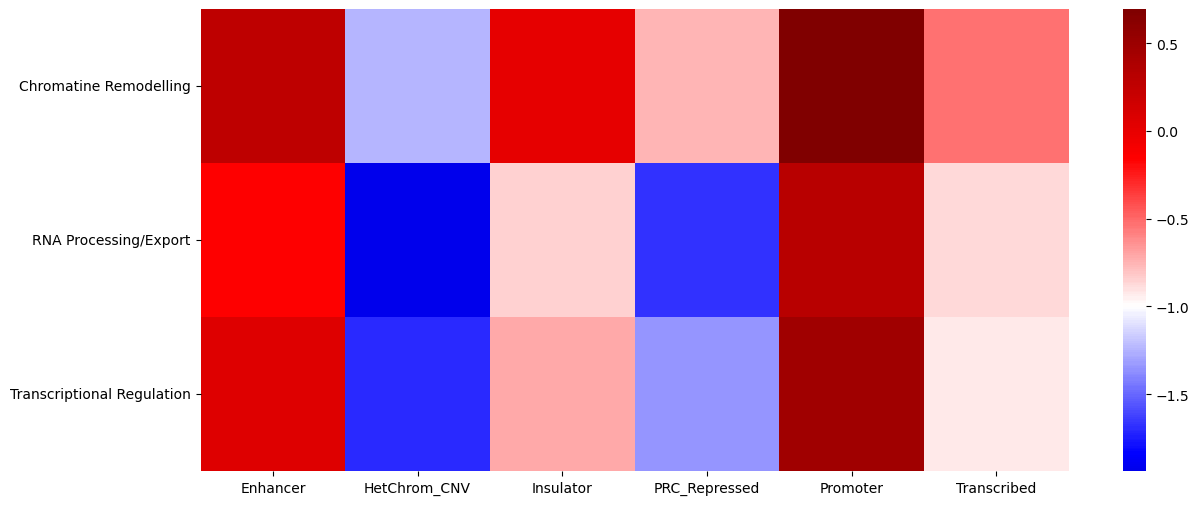

In [55]:
plt.figure(figsize=(14,6))

tmp = np.log10(res_df)
#tmp.index = pd.CategoricalIndex(tmp.index, 
#                                categories= ["Chromatine Remodelling", 
#                                             "Transcriptional Regulation",
#                                             "RNA Processing/Export"])
#tmp.sort_index(level=0, ascending=True, inplace=True)


sns.heatmap(tmp, cmap="seismic", center=-1)